In [1]:
import tensorflow as tf
import numpy
import pandas as pd
numpy.random.seed(10)
from sklearn import preprocessing
from sklearn.utils import shuffle
import os
import fileinput

In [2]:
df = pd.read_excel("data/1129milk/input.xlsx")

In [3]:
ndarray = df.values
df_Label = ndarray[:,0:1]
df_Features = ndarray[:,1:122]


In [5]:
#msk = numpy.random.rand(len(ndarray)) < 0.7
#train_df = ndarray[msk]
#test_df = ndarray[~msk]

In [7]:
#train_df.shape

(109, 122)

In [8]:
#pd.DataFrame(test_df).to_csv("data/123.csv")

In [4]:
df_Features

array([[12.395233 , 11.185388 ,  8.591466 , ..., 28.587265 , 24.56979  ,
        21.945053 ],
       [12.395233 , 11.185388 ,  8.591466 , ..., 28.587265 , 24.56979  ,
        21.945053 ],
       [ 7.6063037,  6.338762 ,  4.6240187, ..., 25.064125 , 20.670801 ,
        17.740328 ],
       ...,
       [ 8.493525 ,  6.2123933,  2.6833553, ..., 38.111294 , 33.81574  ,
        30.342077 ],
       [ 3.7980077,  1.9675654,  0.5300133, ..., 32.412384 , 28.557667 ,
        26.653084 ],
       [ 4.1031756,  3.512163 ,  2.7512553, ..., 31.342113 , 27.283508 ,
        26.149073 ]])

In [5]:
def Standardize(Features):    

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    
    scaledFeatures=minmax_scale.fit_transform(Features) 
    return scaledFeatures

In [6]:
std_df_Features=Standardize(df_Features)

In [7]:
std_input=numpy.hstack([df_Label,std_df_Features])
std_input=shuffle(std_input)

In [8]:
msk = numpy.random.rand(len(std_input)) < 0.7
train_df = std_input[msk]
test_df = std_input[~msk]

In [9]:
train_df.shape

(117, 122)

In [10]:
def Splite(raw_df):    
    Label = raw_df[:,0:1]
    Features = raw_df[:,1:122]
    
    return Features,Label

In [11]:
train_Features,train_Label=Splite(train_df)
test_Features,test_Label=Splite(test_df)

In [12]:
#test_Features
#test_Label
#train_Features
#train_Label
#test_Features.dtype
#test_Label.dtype

In [13]:
#train_Features.shape
#test_Features.shape
#train_Label.shape
#test_Label.shape

(117, 121)

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = tf.keras.Sequential()


model.add(tf.keras.layers.Dense(units=10, input_dim=121, 
                                kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dense(units=200, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                1220      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=40,
                         batch_size=3,verbose=2)

Train on 105 samples, validate on 12 samples
Epoch 1/40
105/105 - 1s - loss: 0.6928 - accuracy: 0.5524 - val_loss: 0.6912 - val_accuracy: 1.0000
Epoch 2/40
105/105 - 0s - loss: 0.6831 - accuracy: 1.0000 - val_loss: 0.6680 - val_accuracy: 1.0000
Epoch 3/40
105/105 - 0s - loss: 0.6334 - accuracy: 1.0000 - val_loss: 0.5847 - val_accuracy: 1.0000
Epoch 4/40
105/105 - 0s - loss: 0.5064 - accuracy: 1.0000 - val_loss: 0.4140 - val_accuracy: 1.0000
Epoch 5/40
105/105 - 0s - loss: 0.3222 - accuracy: 1.0000 - val_loss: 0.2354 - val_accuracy: 1.0000
Epoch 6/40
105/105 - 0s - loss: 0.1653 - accuracy: 1.0000 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 7/40
105/105 - 0s - loss: 0.0826 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 8/40
105/105 - 0s - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 9/40
105/105 - 0s - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 10/40
105/105 - 0s - loss: 0.0199 - accuracy: 1.0

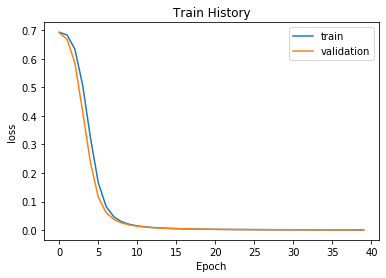

In [19]:
#show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

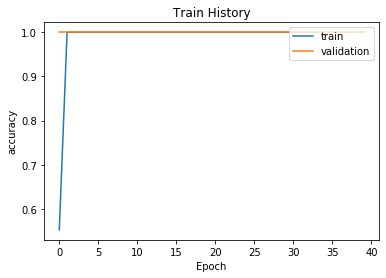

In [20]:
show_train_history(train_history,'accuracy','val_accuracy')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

43/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [22]:
scores[1]

1.0

In [23]:
test = pd.read_excel("data/1129milk/36Data.xlsx")

In [24]:
input_test=numpy.vstack([df_Features,test])
std_input_test = Standardize(input_test)


In [25]:
std_input_test[80]

array([0.46489292, 0.4442065 , 0.38070761, 0.25561928, 0.00465197,
       0.        , 0.        , 0.        , 0.07513481, 0.20862293,
       0.5253672 , 0.42446897, 0.35196423, 0.44494958, 0.54083179,
       0.63055186, 0.66023062, 0.67721656, 0.47907782, 0.22980093,
       0.06858463, 0.04448125, 0.16732591, 0.19654958, 0.20555016,
       0.1593962 , 0.11631708, 0.12355628, 0.14826648, 0.17958064,
       0.19399952, 0.21797232, 0.22785998, 0.21715054, 0.23147459,
       0.23155392, 0.2477973 , 0.27496076, 0.25462215, 0.22070643,
       0.19941357, 0.19966093, 0.24415488, 0.26045544, 0.3158466 ,
       0.34737766, 0.3692902 , 0.40912077, 0.40131388, 0.39102257,
       0.38050262, 0.39598887, 0.4767514 , 0.54521664, 0.65425404,
       0.76906964, 0.78307193, 0.78640105, 0.75251572, 0.77338406,
       0.77325819, 0.7214756 , 0.69059492, 0.61128504, 0.52956536,
       0.48337034, 0.47219745, 0.45938475, 0.51750542, 0.57789529,
       0.68368733, 0.78613862, 0.83442368, 0.79344974, 0.78788

In [26]:
prediction=model.predict(std_input_test)

In [27]:
prediction[80]

array([0.00339693], dtype=float32)

In [28]:
test_all= pd.read_excel("data/0928milk/test remain.xlsx")

In [29]:
testall_array = test_all.values
testall_Label = testall_array[:,0:1]
testall_Features = testall_array[:,1:122]
input_testall=numpy.vstack([df_Features,testall_Features])
std_input_testall = Standardize(input_testall)

In [30]:
std_testall=std_input_testall[80:]
std_testall.shape

(185, 121)

In [31]:
prediction_all=model.predict(std_testall)

In [32]:
result=numpy.hstack([prediction_all,testall_Label])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 185 and the array at index 1 has size 105

In [84]:
result

array([[0.99467927, 1.        ],
       [0.99103284, 1.        ],
       [0.99745178, 1.        ],
       [0.96315306, 1.        ],
       [0.99674475, 1.        ],
       [0.98343623, 1.        ],
       [0.97419345, 1.        ],
       [0.98702049, 1.        ],
       [0.9894712 , 1.        ],
       [0.98825622, 1.        ],
       [0.99249697, 1.        ],
       [0.99172902, 1.        ],
       [0.96999562, 1.        ],
       [0.99255323, 1.        ],
       [0.99337244, 1.        ],
       [0.98538053, 1.        ],
       [0.99474728, 1.        ],
       [0.99303734, 1.        ],
       [0.97463864, 1.        ],
       [0.97732025, 0.        ],
       [0.99515593, 0.        ],
       [0.99317265, 0.        ],
       [0.98102272, 0.        ],
       [0.98914051, 0.        ],
       [0.9738875 , 0.        ],
       [0.98556721, 0.        ],
       [0.99733818, 0.        ],
       [0.99304271, 0.        ],
       [0.98283029, 0.        ],
       [0.99679124, 0.        ],
       [0.

In [83]:
ans=0
for i in range(len(result)):
    if result[i,0]>0.5 and result[i,1]==1:
        ans=ans+1
    if result[i,0]<0.5 and result[i,1]==0:
        ans=ans+1
    
print(ans/len(result))

0.638095238095238


In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("spectrum_milk_freshness_detection_1129.tflite", "wb").write(tflite_model)
#===========================================
model.save('spectrum_milk_freshness_detection_1129.h5')